# ARIMA 2
- Revisão
- I do ARIMA
- ARI
- MA
- IMA
- ARIMA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.datasets import co2, get_rdataset
plt.rcParams["figure.figsize"] = [10, 3]
# Co2 (Tendência e Sazonalidade Aditiva)
co2_df = co2.load_pandas().data
co2_s = pd.Series(co2_df['co2'].ffill().resample('MS').mean(), name='Mauna Loa CO2')
# Air Passenger (Tendência e Sazonalidade Multiplicativa)
air_passengers = get_rdataset("AirPassengers").data
air_passengers.index = pd.date_range('1949', '1960-12', freq='MS')
airp_s = pd.Series(air_passengers['value'], name = 'Número de Passageiros')
# Séries com ações
file = Path('/Users/danielferreira/Documents/git/classes/ASN/Séries Temporais/dados/closing_price.csv')
closing_price = pd.read_csv(file, index_col='Date',parse_dates=True).resample('MS').mean()
apple = pd.Series(closing_price['AAPL'], name='Preço de Fechamento Apple')
microsoft = pd.Series(closing_price['MSFT'], name='Preço de Fechamento Microsoft')
ibm = pd.Series(closing_price['IBM'], name='Preço de Fechamento IBM')
# Lancamentos Netflix
netf = pd.read_csv('/Users/danielferreira/Documents/git/classes/ASN/Séries Temporais/dados/netflix_titles.csv')
netf.index = pd.to_datetime(netf['date_added'], format='%B %d, %Y', errors = 'coerce')
lancamentos = netf.resample('MS').size()
netflix = pd.Series(lancamentos[lancamentos.index.year>2015],name='Lançamentos Netflix desde 2016')
# Lista com todas as séries
todas_series = [co2_s,airp_s,apple,microsoft,ibm, netflix]

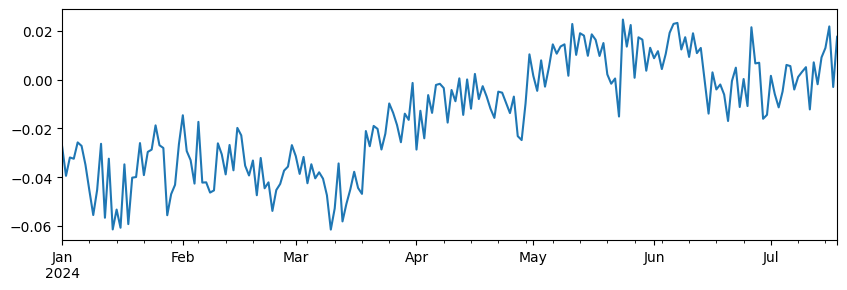

In [28]:
df = pd.read_csv('/Users/danielferreira/Documents/git/classes/ASN/Séries Temporais/dados/AR_Exemplo.csv')
Y = pd.Series(df['preco_diff'])
Y.index = pd.date_range(start='2024-01-01', periods=200)
Y.plot()
plt.show()

## AR
$$ Y_t = \phi_0 + \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \dots + \phi_p Y_{t-p} + \epsilon_t $$
## MA
$$ Y_t = \mu + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \dots + \theta_q \epsilon_{t-q} + \epsilon_t $$
## IMA
$$ (1 - B^d) Y_t = \mu + \theta_1 \epsilon_{t-1} + \dots + \theta_q \epsilon_{t-q} + \epsilon_t$$
## ARI
$$ (1 - B^d) Y_t = \phi_0 + \phi_1 Y_{t-1} + \dots + \phi_p Y_{t-p} + \epsilon_t $$
## ARIMA
$$ (1 - B^d) Y_t = \phi_0 + \phi_1 Y_{t-1} + \dots + \phi_p Y_{t-p} + \epsilon_t + \theta_1 \epsilon_{t-1} + \dots + \theta_q \epsilon_{t-q} $$


AR Model Summary:
                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -268.765
Date:                Sat, 22 Feb 2025   AIC                            545.529
Time:                        20:46:38   BIC                            558.722
Sample:                             0   HQIC                           550.868
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0504      0.076     -0.661      0.509      -0.200       0.099
ar.L1          0.4656      0.079      5.876      0.000       0.310       0.621
ar.L2         -0.3301      0.074 

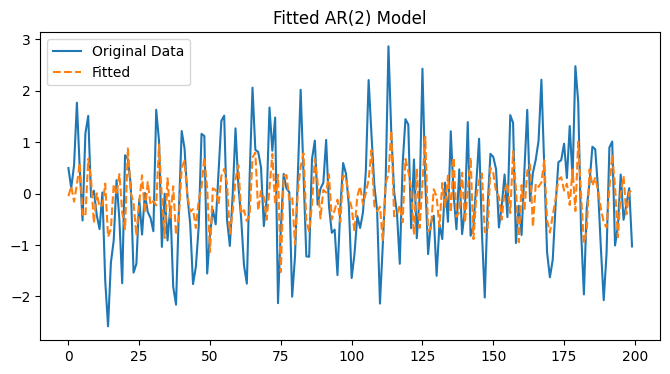


MA Model Summary:
                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -282.741
Date:                Sat, 22 Feb 2025   AIC                            573.482
Time:                        20:46:38   BIC                            586.675
Sample:                             0   HQIC                           578.821
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1017      0.080      1.272      0.203      -0.055       0.258
ma.L1          0.5639      0.541      1.042      0.297      -0.497       1.625
ma.L2         -0.4355      0.249

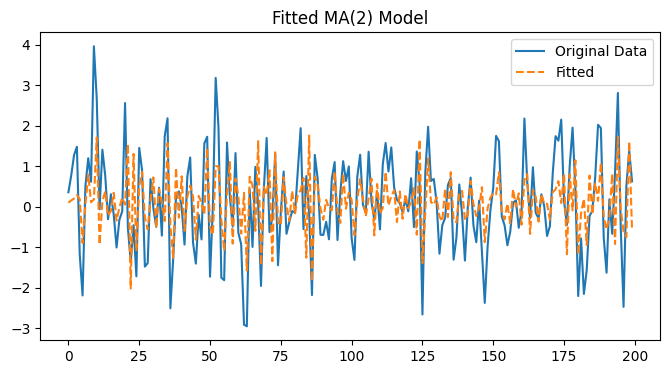


IMA Model Summary:
                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -280.194
Date:                Sat, 22 Feb 2025   AIC                            564.388
Time:                        20:46:38   BIC                            570.975
Sample:                             0   HQIC                           567.054
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0680      0.074      0.917      0.359      -0.077       0.213
sigma2         0.9784      0.101      9.700      0.000       0.781       1.176
Ljung-Box (L1) (Q):            

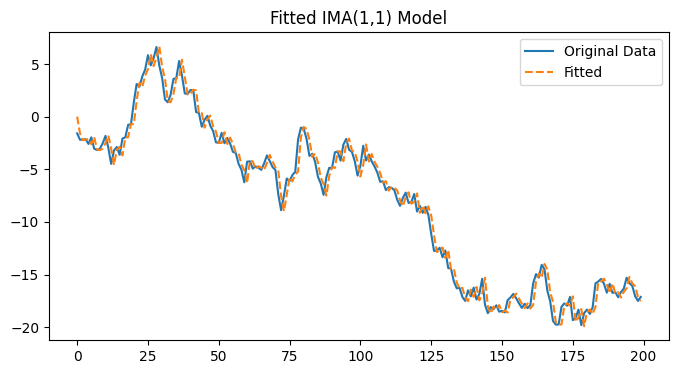


ARI Model Summary:
                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -300.696
Date:                Sat, 22 Feb 2025   AIC                            605.392
Time:                        20:46:38   BIC                            611.978
Sample:                             0   HQIC                           608.058
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1857      0.068     -2.717      0.007      -0.320      -0.052
sigma2         1.2020      0.127      9.468      0.000       0.953       1.451
Ljung-Box (L1) (Q):            

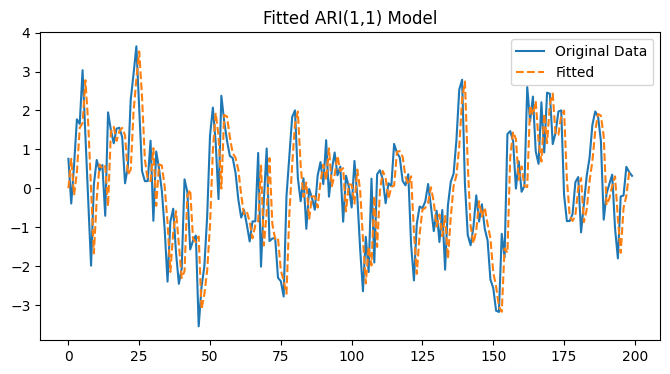


ARIMA Model Summary:
                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -275.712
Date:                Sat, 22 Feb 2025   AIC                            557.425
Time:                        20:46:39   BIC                            567.305
Sample:                             0   HQIC                           561.423
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0283      0.077      0.367      0.714      -0.123       0.179
ma.L1         -0.9800      0.022    -43.676      0.000      -1.024      -0.936
sigma2         0.9205      0.

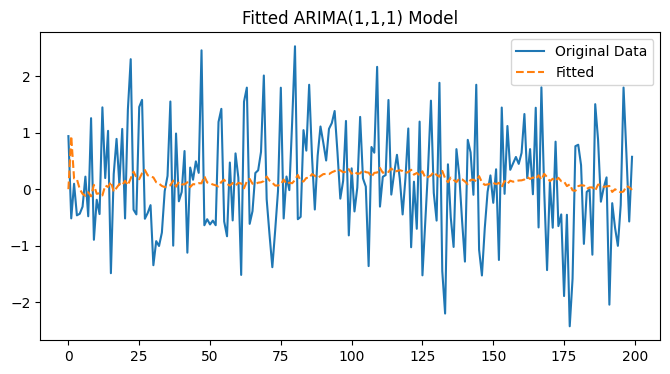


All models fitted successfully!


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess

np.random.seed(42)
n = 200  # Number of time points

# Function to plot original vs fitted values
def plot_fitted(y, y_pred, title):
    plt.figure(figsize=(8, 4))
    plt.plot(y, label="Original Data")
    plt.plot(y_pred, label="Fitted", linestyle="dashed")
    plt.title(title)
    plt.legend()
    plt.show()

# 1. **Autoregressive (AR) Model**
# AR(2): Y_t = 0.5 Y_{t-1} - 0.3 Y_{t-2} + ε_t
ar_params = np.array([0.5, -0.3])
ma_params = np.array([0])  # No MA component
ar = np.r_[1, -ar_params]
ma = np.r_[1, ma_params]
ar_process = ArmaProcess(ar, ma)
y_ar = ar_process.generate_sample(nsample=n)

ar_model = ARIMA(y_ar, order=(2, 0, 0)).fit()
print("AR Model Summary:\n", ar_model.summary())
plot_fitted(y_ar, ar_model.fittedvalues, "Fitted AR(2) Model")

# 2. **Moving Average (MA) Model**
# MA(2): Y_t = ε_t + 0.6 ε_{t-1} - 0.4 ε_{t-2}
ma_params = np.array([0.6, -0.4])
ar_params = np.array([0])
ar = np.r_[1, ar_params]
ma = np.r_[1, ma_params]
ma_process = ArmaProcess(ar, ma)
y_ma = ma_process.generate_sample(nsample=n)

ma_model = ARIMA(y_ma, order=(0, 0, 2)).fit()
print("\nMA Model Summary:\n", ma_model.summary())
plot_fitted(y_ma, ma_model.fittedvalues, "Fitted MA(2) Model")

# 3. **Integrated Moving Average (IMA) Model**
# IMA(1,1): Y_t = Y_{t-1} + ε_t + 0.5ε_{t-1}
epsilon = np.random.normal(0, 1, n)
y_ima = np.cumsum(epsilon)  # Random walk

ima_model = ARIMA(y_ima, order=(0, 1, 1)).fit()
print("\nIMA Model Summary:\n", ima_model.summary())
plot_fitted(y_ima, ima_model.fittedvalues, "Fitted IMA(1,1) Model")

# 4. **Autoregressive Integrated (ARI) Model**
# ARI(1,1): (1 - B) Y_t = 0.7 Y_{t-1} + ε_t
phi = 0.7
y_ari = np.zeros(n)
y_ari[0] = np.random.normal()
for t in range(1, n):
    y_ari[t] = phi * y_ari[t - 1] + np.random.normal()

ari_model = ARIMA(y_ari, order=(1, 1, 0)).fit()
print("\nARI Model Summary:\n", ari_model.summary())
plot_fitted(y_ari, ari_model.fittedvalues, "Fitted ARI(1,1) Model")

# 5. **Autoregressive Integrated Moving Average (ARIMA) Model**
# ARIMA(1,1,1): Combines AR(1), differencing, and MA(1)
y_arima = np.random.normal(size=n)  # Simulated dataset

arima_model = ARIMA(y_arima, order=(1, 1, 1)).fit()
print("\nARIMA Model Summary:\n", arima_model.summary())
plot_fitted(y_arima, arima_model.fittedvalues, "Fitted ARIMA(1,1,1) Model")

print("\nAll models fitted successfully!")
